<h3>1.1 EDA</h3>
<h3>Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?</h3>
<p>
För att ta reda på hur många som har hjärt-kärlsjukdomar måste vi importera data samt sortera efter frågeställningen.
Det går lätt att göra med hjälp av Panda
</p>

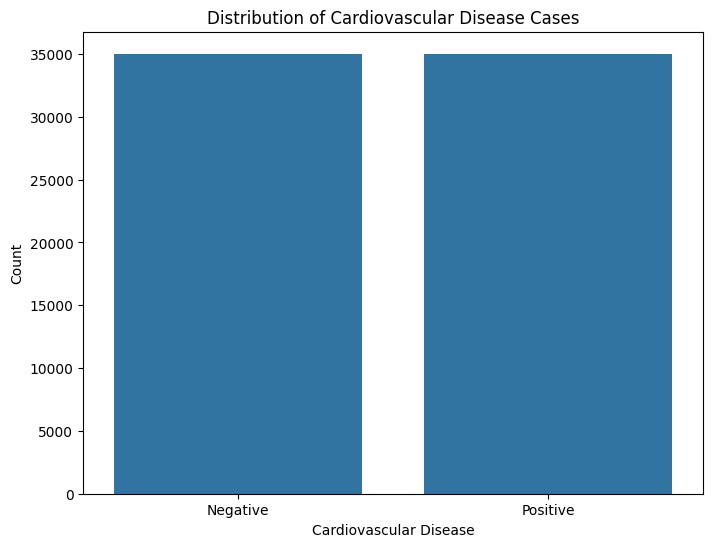

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/cardio_train.csv", sep=';')

df.head()

cardio_counts = df['cardio'].value_counts()

cardio_counts

plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease Cases')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

<p>
Med hjälp av sorteringen kan vi tydligt se att 50% av alla i datan är positiva / negativa för hjärt-kärlsjukdomar.
</p>
<h3>Hur stor andel har normala, över normala och långt över normala kolesterolvärden?</h3>

Percentage with normal cholesterol levels: 74.83571428571429 %
Percentage with above-normal cholesterol levels: 13.641428571428571 %
Percentage with far-above-normal cholesterol levels: 11.522857142857143 %


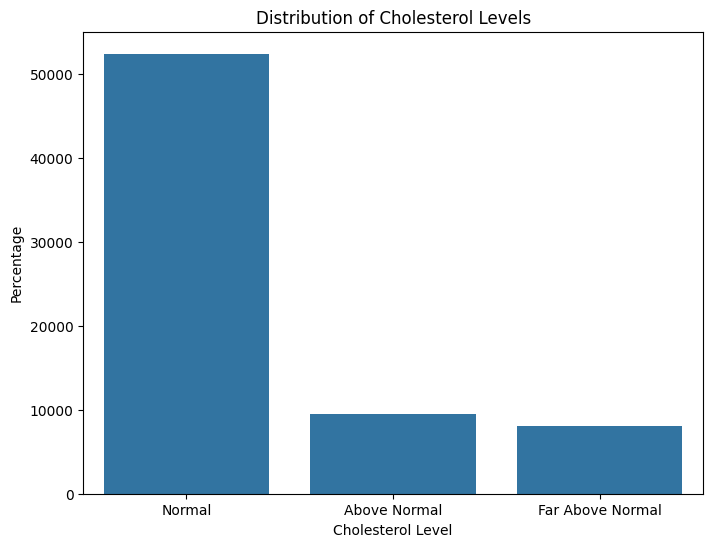

In [2]:
cholesterol_counts = df['cholesterol'].value_counts(normalize=True) * 100

# Print out the percentages
print("Percentage with normal cholesterol levels:", cholesterol_counts[1], "%")
print("Percentage with above-normal cholesterol levels:", cholesterol_counts[2], "%")
print("Percentage with far-above-normal cholesterol levels:", cholesterol_counts[3], "%")

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cholesterol', data=df, order=[1, 2, 3])
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2], ['Normal', 'Above Normal', 'Far Above Normal'])
plt.show()

<h3>Hur ser ålderfördelningen ut?</h3>

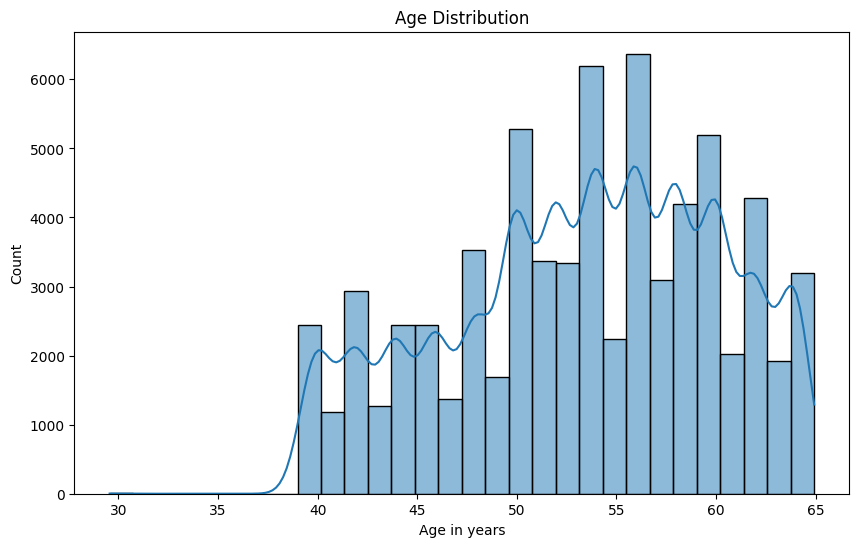

In [3]:
#c) Hur ser  ̊alders fördelningen ut?

df['age_years'] = df['age'] / 365.25


plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age in years')
plt.ylabel('Count')
plt.show()

<p>Man ser tydligt i diagramet att nästan alla i datan är emellan 40-65 år gammla.</p>

<h3>Hur stor andel röker?</h3>

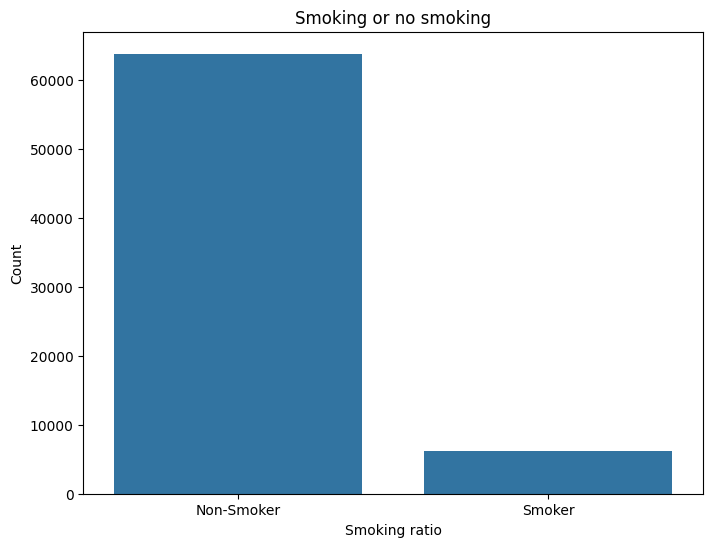

Det finns 6169 rökare i datan


In [4]:
df.head()

smoke_counts = df['smoke'].value_counts()

smoke_counts

plt.figure(figsize=(8, 6))
sns.countplot(x='smoke', data=df)
plt.title('Smoking or no smoking')
plt.xlabel('Smoking ratio')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

print(f"Det finns {smoke_counts[1]} rökare i datan")

<h3>Hur viktfördelingen och längfördelningen ser ut?</h3>

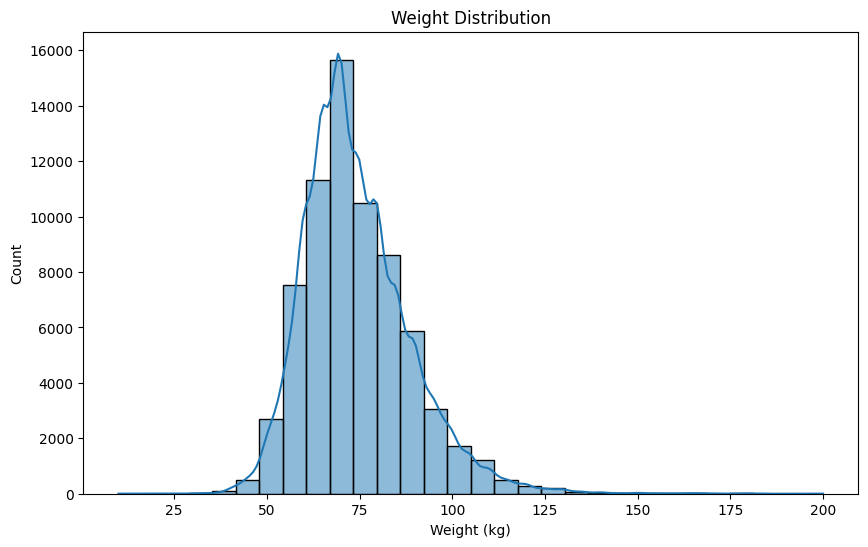

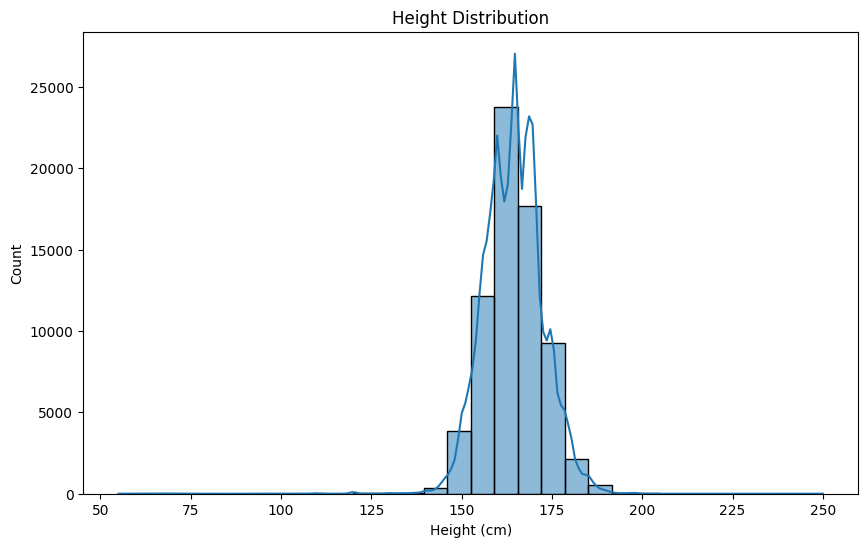

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=30, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['height'], bins=30, kde=True)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

<h3>Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?</h3>

Percentage of women with cardiovascular disease: 49.67274324621129 %
Percentage of men with cardiovascular disease: 50.52308949734369 %


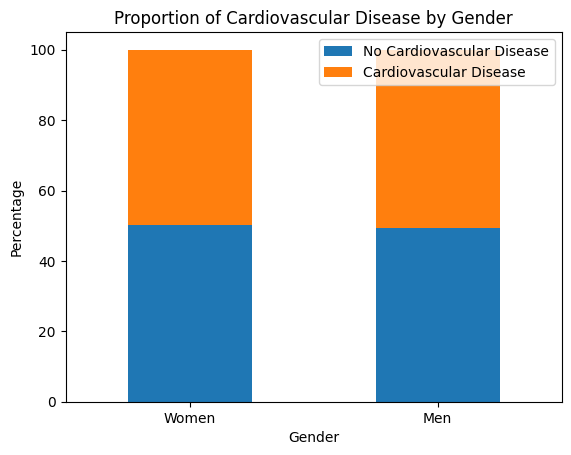

In [6]:
cardio_gender = df.groupby('gender')['cardio'].value_counts(normalize=True).unstack() * 100


print("Percentage of women with cardiovascular disease:", cardio_gender.loc[1, 1], "%")
print("Percentage of men with cardiovascular disease:", cardio_gender.loc[2, 1], "%")


cardio_gender.plot(kind='bar', stacked=True)
plt.title('Proportion of Cardiovascular Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Women', 'Men'], rotation=0)
plt.legend(['No Cardiovascular Disease', 'Cardiovascular Disease'], loc='upper right')
plt.show()

#Skriv något vettigt här vetja

<h3>1.2 Modelldesign</h3>
<p>Vi har gjort en heatmap över datan för att visa olika korrelationer</p>

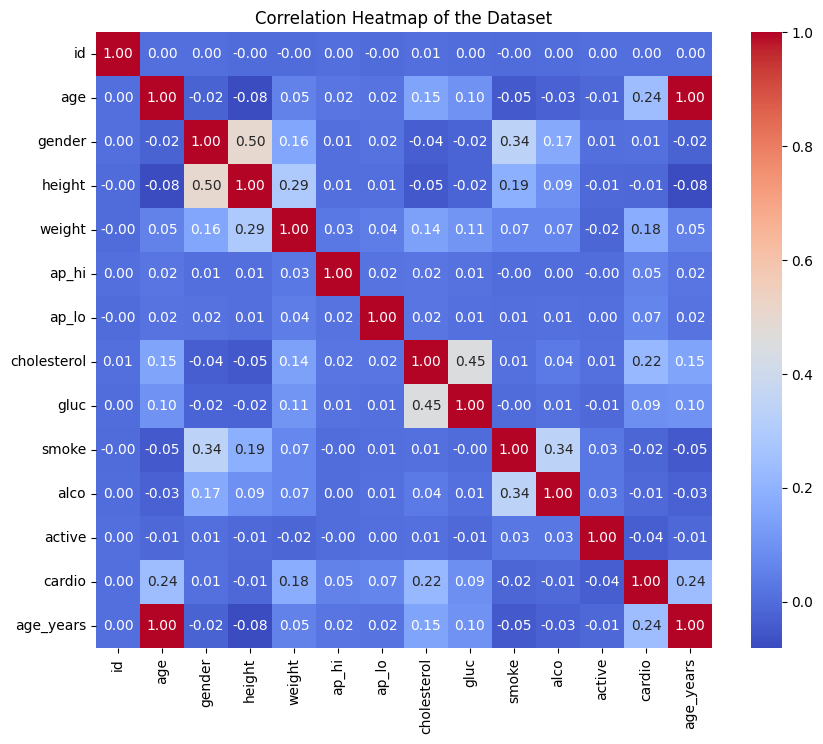

In [7]:


# Calculate the correlation matrix
corr_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of the Dataset')
plt.show()

<h3>Sammanfattning av heatmap</h3>
<p>
Det första vi kollar på är vad det är som påverkar cardio parametern.<br>
1. Åldern med 0.24<br>
2. Kolestrol med 0.22<br>
3. Vikten med 0.18<br>
Men andra intressanta fynd är att gluc påverkar kolestrol med 0.45 vilket är en av bidragarna till hjärtkärlsjukdomar.<br>
De andra parametrarna har väldigt liten påverkan ifall någon har en hjärtkärlsjukdom eller inte.<br>
Samt att alkohol och rökning nästan går hand i hand med en korrelation på 0.34<br>
</p>

<h3>1.2.1 Feature Engineering</h3>

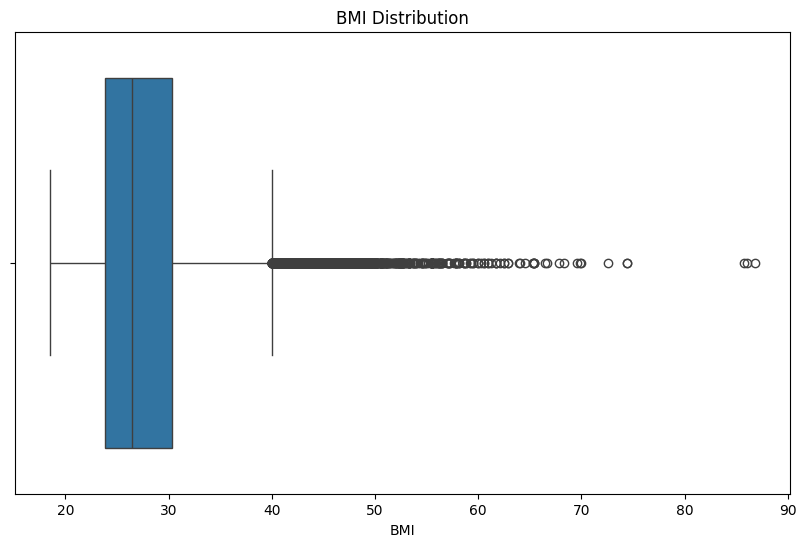

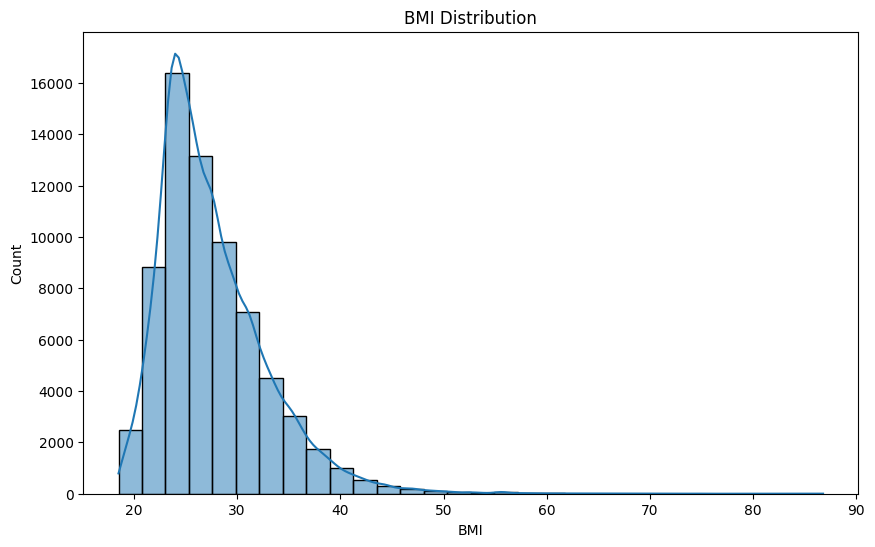

In [14]:
# BMI = Weight / M^2
# Normal range	18.5 – 24.9
# Overweight (Pre-obese)	25.0 – 29.9
# Obese (Class I)	30.0 – 34.9
# Obese (Class II)	35.0 – 39.9
# Obese (Class III)	≥ 40.0

df["height"].head()
df['height_m'] = df['height'] / 100

df['BMI'] = df['weight'] / (df['height_m'] ** 2)

# Drop any BMI over 60 and under 18.5
df_filtered = df[(df['BMI'] >= 18.5) & (df['BMI'] <= 90)]

# Plotting the BMI values
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['BMI'])
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

#Plot2
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

<p>Valde att ha en range emellan 18.5 BMI samt satte det högsta BMI till 90</p>

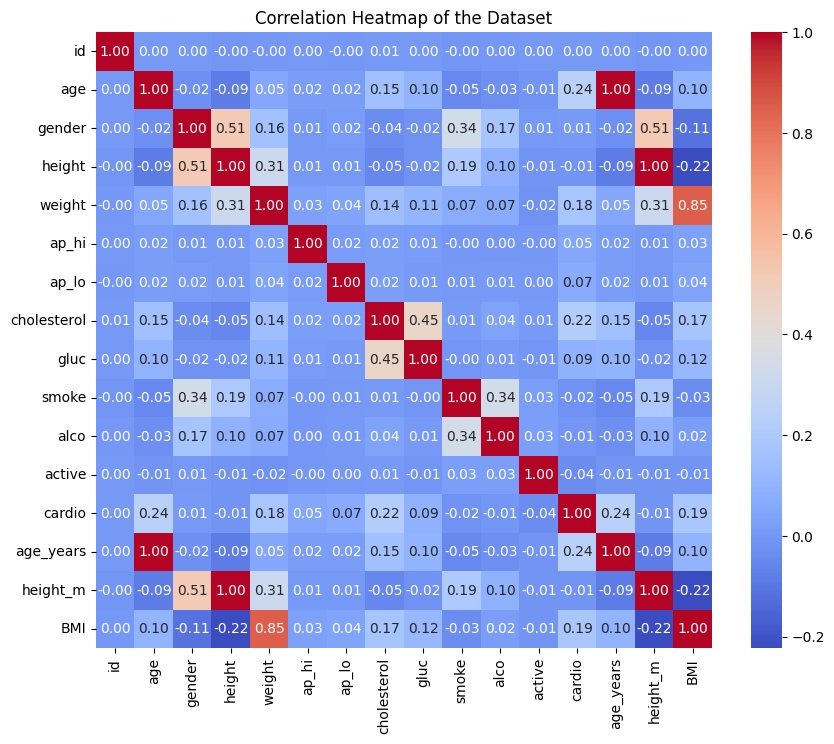

In [15]:
# Calculate the correlation matrix
corr_matrix = df_filtered.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of the Dataset')
plt.show()


<h3>Sammanfattning av den nya matrixen</h3>
<p>
Tidigare resultat för cardio<br>
1. Åldern med 0.24<br>
2. Kolestrol med 0.22<br>
3. Vikten med 0.18<br>
<br>
Det som påverkar BMI<br>
1. Vikten med 0.85<br>
2. Cardio med 0.19<br>
3. Kolesterol med 0.17<br>
4. gluc med 0.12<br>
5. ålder med 0.1<br>
För cardio ser det nästan ut som förut förutom att bmi har en påverkan med 0.19
<p>

C:\Users\johan\AppData\Local\Temp\ipykernel_12400\922693760.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["BMI_Category"] = df_filtered["BMI"].apply(categorize_bmi)


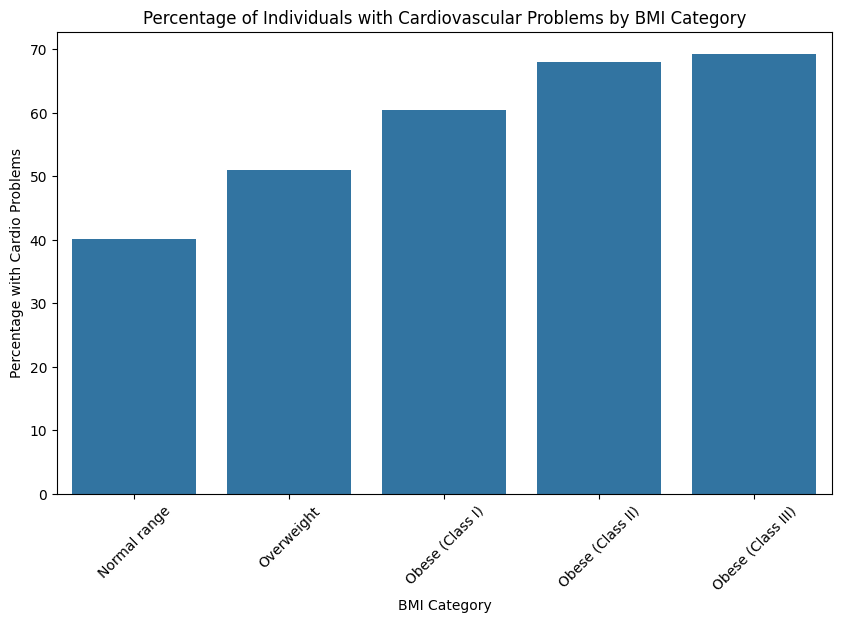

In [18]:
# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal range'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese (Class I)'
    elif 35 <= bmi < 40:
        return 'Obese (Class II)'
    else:  # BMI >= 40
        return 'Obese (Class III)'

df_filtered["BMI_Category"] = df_filtered["BMI"].apply(categorize_bmi)

#df_filtered

cardio_by_bmi = df_filtered.groupby('BMI_Category')['cardio'].mean() * 100

# Convert the Series to DataFrame for better handling in the plotting
cardio_by_bmi_df = cardio_by_bmi.reset_index(name='Percentage with Cardio Problems')

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI_Category', y='Percentage with Cardio Problems', data=cardio_by_bmi_df, order=['Normal range', 'Overweight', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)'])
plt.title('Percentage of Individuals with Cardiovascular Problems by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Percentage with Cardio Problems')
plt.xticks(rotation=45)
plt.show()

<p>Man kan tydligt se att chansen för en hjärtkärlsjukdom ökar med de olika bmi klasserna</p>

TEMP MARKDOWN<br>

 a) Släng bort samples med orimliga blodtryck och outliers. Likt förra uppgiften är det inte trivialt att sätta gärnserna. Beskriv hur du kommer fram till gränserna.<br>
 b) Skapa en kategorisk feature med relevanta kategorier.<br>
 c) Undersök om den nya kategorin är relevant, dvs har den någon nyttig korrelation? Uppddatera data-analysen ifall du hittar något intressant.<br>

 Tips: Efter du valt gränserna och skapat kategorier, kolla vilka kategorier som
 faktiskt förekommer i din data.<br>
ap_hi = SYSTOLIC ap_lo = DIASTOLIC<br>
 Healthy - SYSTOLIC less than 120 - DIASTOLIC less than 80<br>
 Elevated - SYSTOLIC 120-129 - DIASTOLIC less than 80<br>
 Stage 1 hypertension - SYSTOLIC 130-139 - DIASTOLIC 80-89<br>
 Stage 2 hypertension - SYSTOLIC 140 or higher - DIASTOTOLIC 90 or higher<br>
 Hypertension crisis - SYSTOLIC over 180 - DIASTOLIC over 120<br>

C:\Users\johan\AppData\Local\Temp\ipykernel_12400\1898052646.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['BP_Category'] = df_filtered.apply(lambda row: categorize_blood_pressure(row['ap_hi'], row['ap_lo']), axis=1)


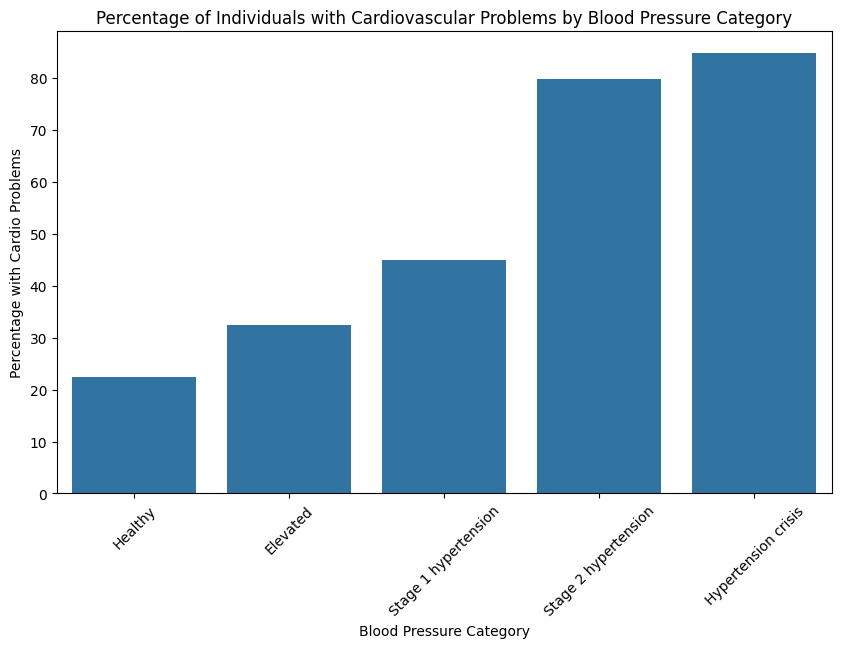

In [19]:
# Define a function to categorize blood pressure
def categorize_blood_pressure(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return "Healthy"
    elif 120 <= systolic < 130 and diastolic < 80:
        return "Elevated"
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return "Stage 1 hypertension"
    elif 140 <= systolic or 90 <= diastolic:
        if systolic >= 180 or diastolic >= 120:
            return "Hypertension crisis"
        return "Stage 2 hypertension"
    else:
        return "Uncategorized"

# elif 18.5 <= bmi < 25:

# Apply the categorize_blood_pressure function to each row to create a new 'BP_Category' column
df_filtered['BP_Category'] = df_filtered.apply(lambda row: categorize_blood_pressure(row['ap_hi'], row['ap_lo']), axis=1)

# Calculate the percentage of individuals with cardiovascular problems in each BP category
cardio_by_bp = df_filtered.groupby('BP_Category')['cardio'].mean() * 100

# Convert the Series to DataFrame for better handling in the plotting
cardio_by_bp_df = cardio_by_bp.reset_index(name='Percentage with Cardio Problems')

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x='BP_Category', y='Percentage with Cardio Problems', data=cardio_by_bp_df, 
            order=['Healthy', 'Elevated', 'Stage 1 hypertension', 'Stage 2 hypertension', 'Hypertension crisis'])
plt.title('Percentage of Individuals with Cardiovascular Problems by Blood Pressure Category')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Percentage with Cardio Problems')
plt.xticks(rotation=45)
plt.show()

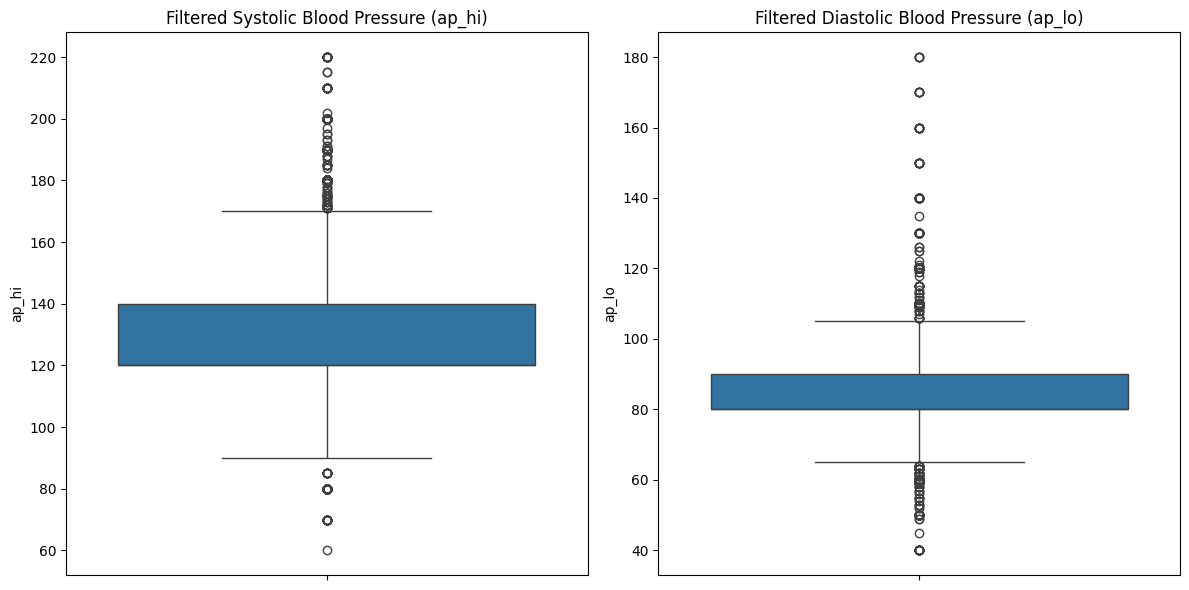

In [28]:

df_filtered = df_filtered[(df_filtered['ap_hi'] <= 225) & (df_filtered['ap_hi'] >= 50) &
                          (df_filtered['ap_lo'] <= 180) & (df_filtered['ap_lo'] >= 40)]

# Create a figure for 2 side-by-side plots
plt.figure(figsize=(12, 6))

# Plot for systolic blood pressure (ap_hi) after applying the new filters
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.boxplot(y='ap_hi', data=df_filtered)
plt.title('Filtered Systolic Blood Pressure (ap_hi)')

# Plot for diastolic blood pressure (ap_lo) after applying the new filters
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.boxplot(y='ap_lo', data=df_filtered)
plt.title('Filtered Diastolic Blood Pressure (ap_lo)')

plt.tight_layout()
plt.show()


In [81]:
import pandas as pd

df1 = pd.read_csv("data/dataframe1.csv", sep=';')
df2 = pd.read_csv("data/dataframe2.csv", sep=';')

#Time to make two dataframes

#Number one: Remove ap_hi, ap_lo, height, weight, bmi and do one-hot encoding for BMI-category and bloodpressure-category
#Number two: Remove BMI-Category, bloodpressure-category, height, weight and do one-hot encoding for gender



,id,age,gender,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI_Category_Normal range,BMI_Category_Obese (Class I),BMI_Category_Obese (Class II),BMI_Category_Obese (Class III),BMI_Category_Overweight,Blood_Pressure_Category_Elevated,Blood_Pressure_Category_Healthy,Blood_Pressure_Category_Stage 1 hypertension,Blood_Pressure_Category_Stage 2 hypertension
0,0,18393,2,1,1,0,0,1,0,50.357290,True,False,False,False,False,False,False,True,False
1,1,20228,1,3,1,0,0,1,1,55.381246,False,True,False,False,False,False,False,False,True
2,2,18857,1,3,1,0,0,0,1,51.627652,True,False,False,False,False,False,False,True,False
3,3,17623,2,1,1,0,0,1,1,48.249144,False,False,False,False,True,False,False,False,True
4,4,17474,1,1,1,0,0,0,0,47.841205,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68099,99993,19240,2,1,1,1,0,1,0,52.676249,False,False,False,False,True,False,False,True,False
68100,99995,22601,1,2,2,0,0,1,1,61.878166,False,False,False,True,False,False,False,False,True
68101,99996,19066,2,3,1,0,1,0,1,52.199863,False,True,False,False,False,False,False,False,True
68102,99998,22431,1,1,2,0,0,0,1,61.412731,False,False,False,False,True,False,False,True,False
